In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [6]:
data = pd.read_csv('P614 DATASET.csv')
print(data.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


# Explore the Data

### Handling the Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data = data.set_index('Date')
display(data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [9]:
display(data.isnull().sum())
display(data.describe())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


### Visulization

<Figure size 1400x1000 with 0 Axes>

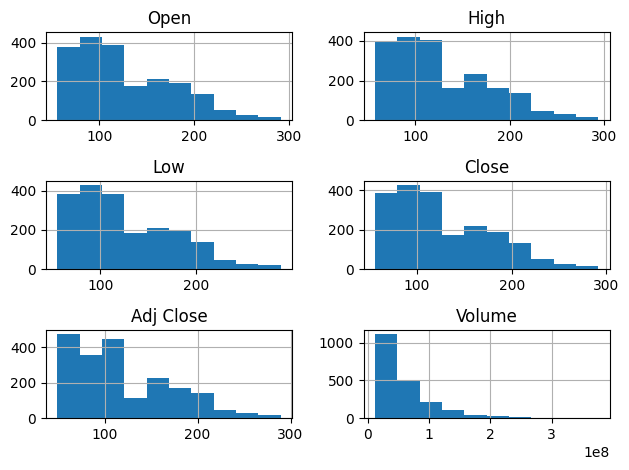

In [10]:
plt.figure(figsize=(14, 10))
data.hist()
plt.tight_layout()
plt.show()

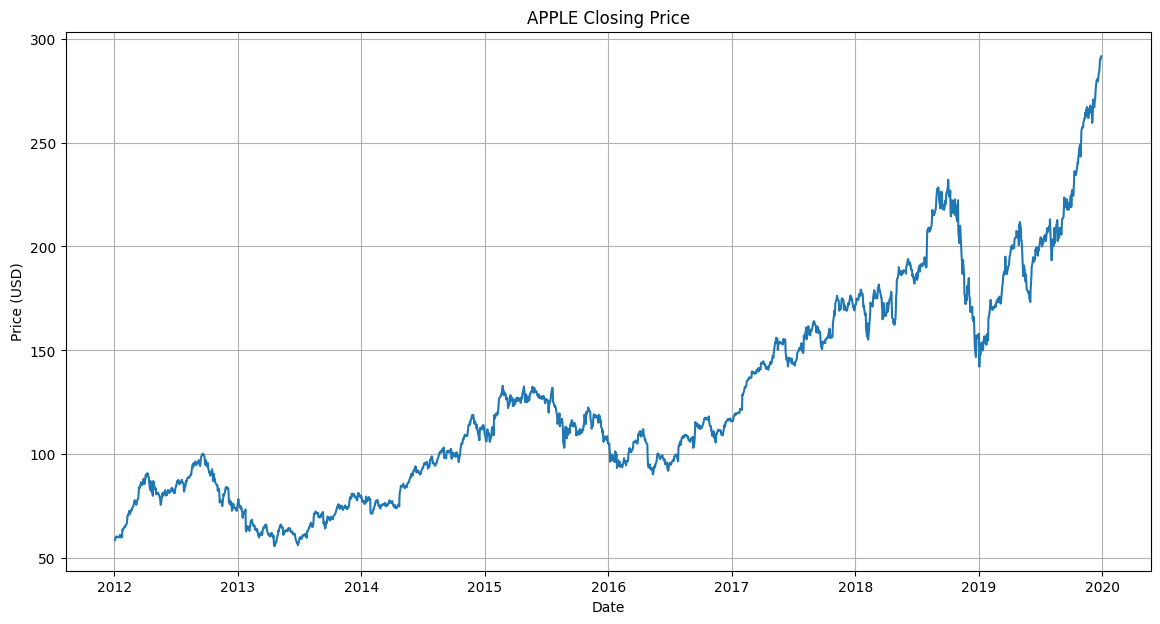

In [11]:
# Plot the closing price
plt.figure(figsize=(14, 7))
sns.lineplot(data = data["Close"])
plt.title('APPLE Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

0.7738383526895003


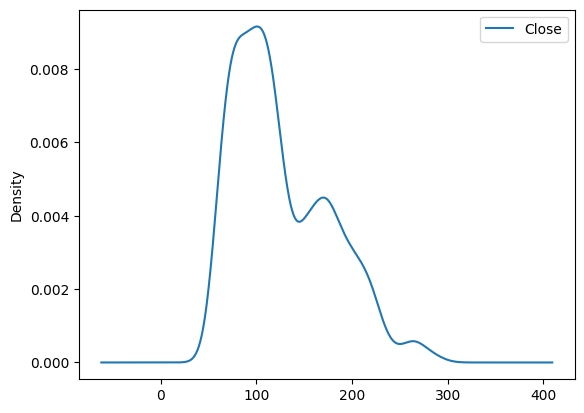

In [12]:
print(data['Close'].skew())
data.plot(y='Close',kind='kde')
pyplot.show()

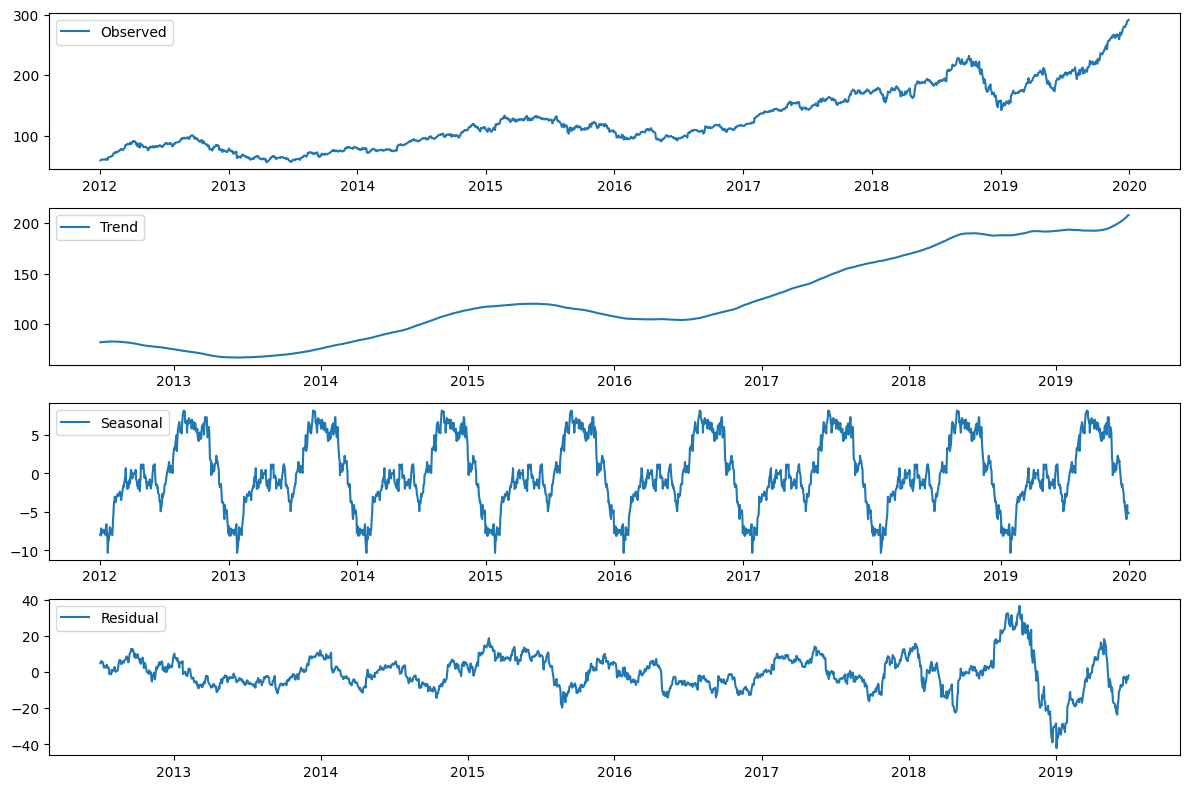

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Close'], model='additive', period=252)  # Assuming 252 trading days in a year

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



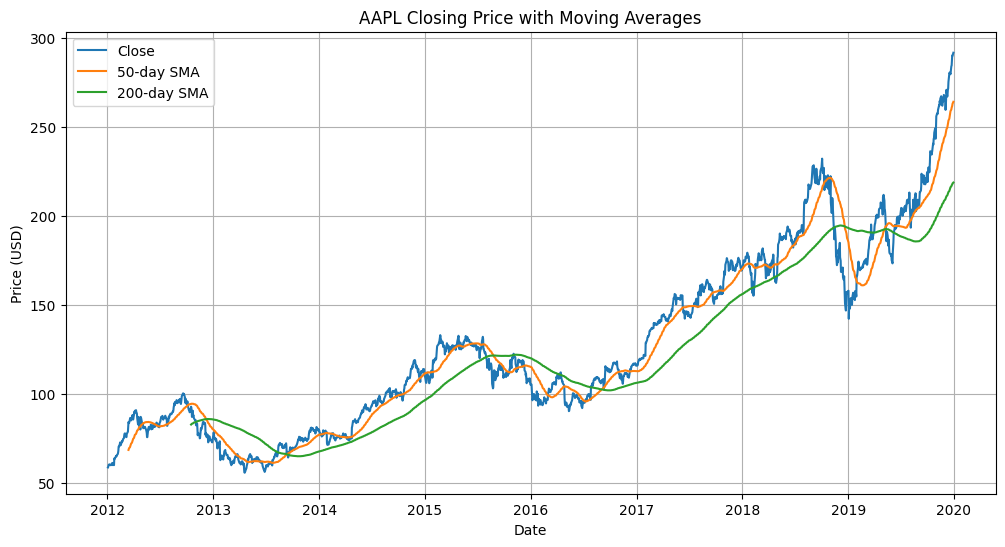

In [14]:
# Calculate the 50-day and 200-day moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Plot the closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['SMA_50'], label='50-day SMA')
plt.plot(data['SMA_200'], label='200-day SMA')
plt.title('AAPL Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Transformation

### Dickey Fuller test

In [15]:
# Agumented Dickey fuller test
from statsmodels.tsa.stattools import adfuller

# Select the target series
ts = data['Close']
# Handle missing values
ts = ts.ffill()

# Perform the ADF test
result = adfuller(ts.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.219370
p-value: 0.996117
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


### Differencing

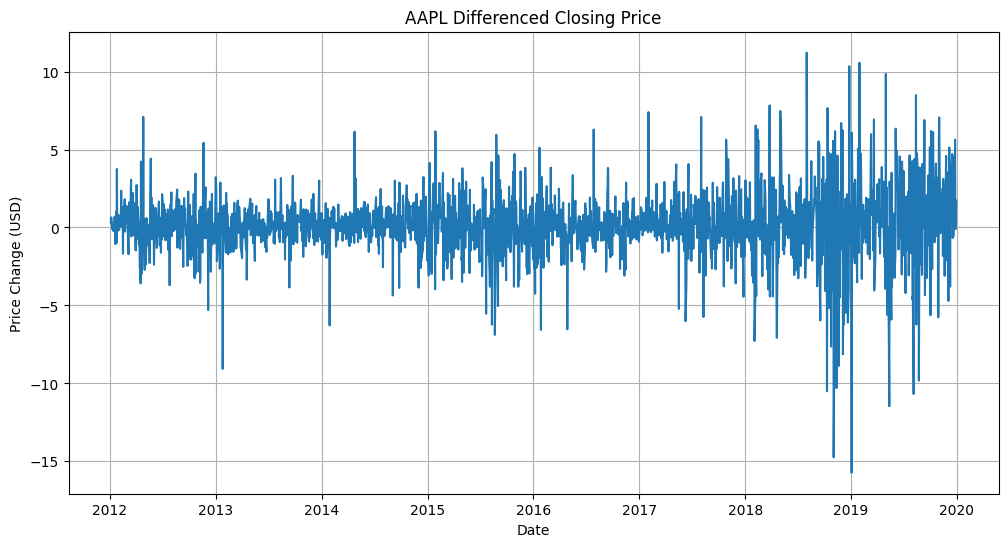

In [16]:
# Create a differenced series
ts_diff = ts.diff()

# Plot the differenced closing price
plt.figure(figsize=(12, 6))
plt.plot(ts_diff)
plt.title('AAPL Differenced Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')
plt.grid(True)
plt.show()

In [17]:
# Perform the ADF test on the differenced data
result = adfuller(ts_diff.dropna())  # Drop NA again, just in case
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.625534
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


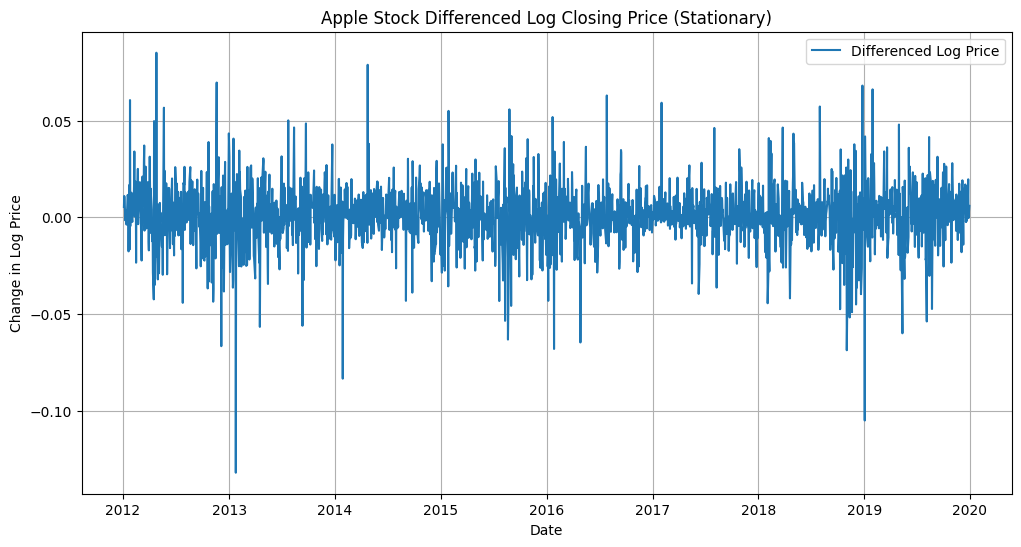


--- ADF Test on Differenced Log Series ---
ADF Statistic: -15.7556
P-value: 0.0000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Result: The series is stationary (Reject Null Hypothesis)


In [18]:
# Select the target series
ts = data['Close']

# Handle missing values (using forward-fill, appropriate for stock prices)
ts = ts.ffill()

# --- Log Transformation ---
ts_log = np.log(ts)

# --- Differencing Transformation (d=1) ---
ts_log_diff = ts_log.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label='Differenced Log Price')
plt.title('Apple Stock Differenced Log Closing Price (Stationary)')
plt.xlabel('Date')
plt.ylabel('Change in Log Price')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('differenced_log_series_plot.png')

# --- ADF Test for Stationarity ---
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'P-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print("Result: The series is stationary (Reject Null Hypothesis)")
    else:
        print("Result: The series is NOT stationary (Fail to Reject Null Hypothesis)")

print("\n--- ADF Test on Differenced Log Series ---")
adf_test(ts_log_diff)

-0.4261063038630462


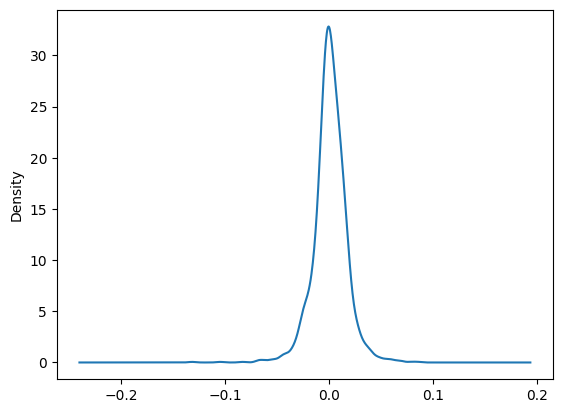

In [19]:
print(ts_log_diff.skew())
ts_log_diff.plot(y='Close',kind='kde')
pyplot.show()

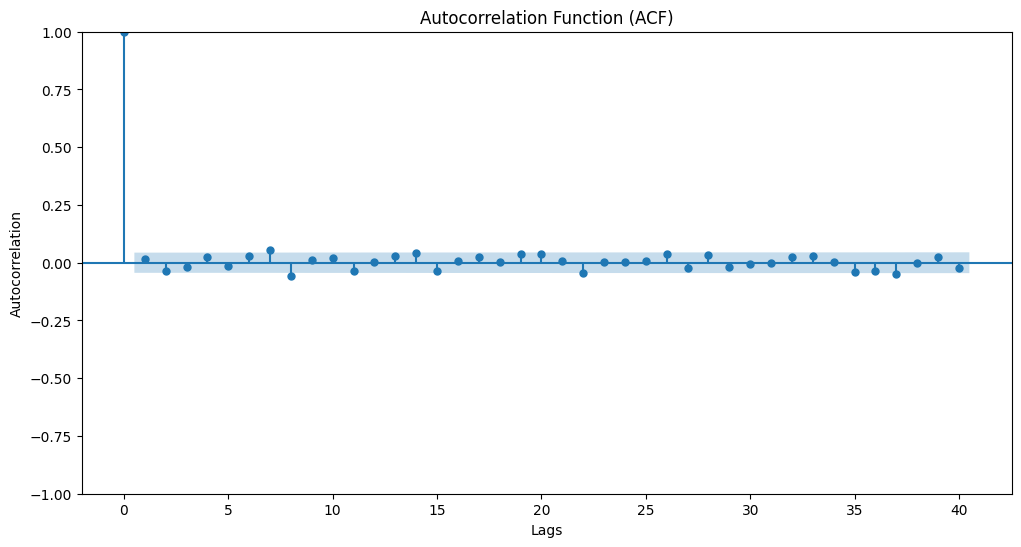

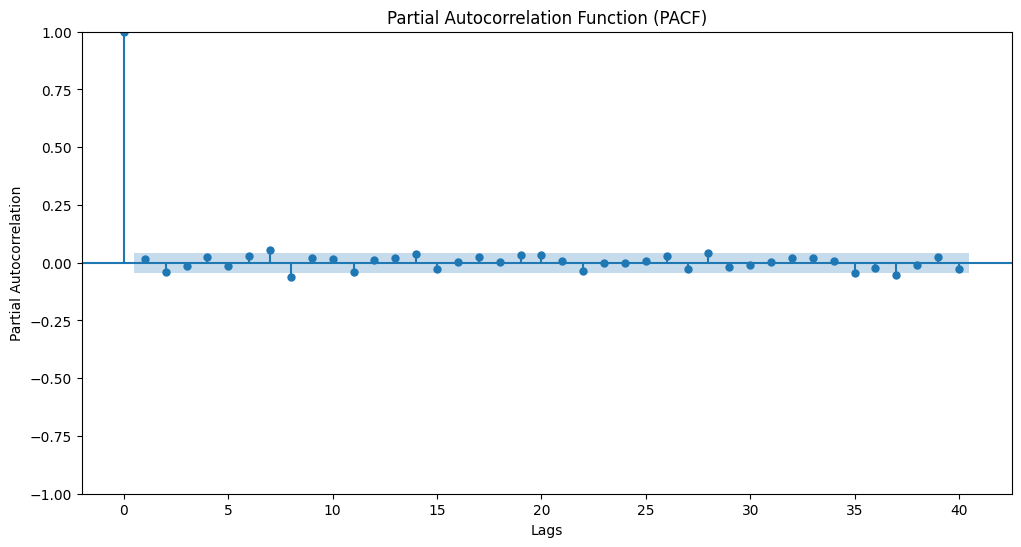

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(ts_log_diff, lags=40, ax=plt.gca())  # Lags = Number of lag periods to show
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(ts_log_diff, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [21]:
X = data.drop(columns=['Close', 'SMA_50',	'SMA_200'], axis=1)
X = X.reindex(ts_log_diff.index)
y = ts_log_diff

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
display(X.head())
display(y.head())

Shape of X: (2010, 5)
Shape of y: (2010,)


,Open,High,Low,Adj Close,Volume
Date,,,,,
2012-01-04,58.571430,59.240002,58.468571,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,52.061932,98506100
2012-01-10,60.844284,60.857143,60.214287,52.248333,64549100


Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
Name: Close, dtype: float64

In [22]:
X = data.drop(columns=['Close', 'SMA_50',	'SMA_200'], axis=1)
X = X.reindex(ts_log_diff.index)
y = ts_log_diff

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
display(X.head())
display(y.head())

Shape of X: (2010, 5)
Shape of y: (2010,)


,Open,High,Low,Adj Close,Volume
Date,,,,,
2012-01-04,58.571430,59.240002,58.468571,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,52.061932,98506100
2012-01-10,60.844284,60.857143,60.214287,52.248333,64549100


Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
Name: Close, dtype: float64

In [23]:
from datetime import timedelta

# 1. Determine the start date for the test set
# Get the last date in the index of y
last_date = y.index.max()
# Calculate the date two years prior
# test_start_date = last_date - timedelta(days=2*252) # Approximation for two years
test_start_date = "2018-01-01 00:00:00" # Approximation for two years

print(f"Last date in data: {last_date}")
print(f"Test set start date: {test_start_date}\n")

# 2. Split X into training and testing sets
X_train = X[X.index < test_start_date]
X_test = X[X.index >= test_start_date]

# 3. Split y into training and testing sets
y_train = y[y.index < test_start_date]
y_test = y[y.index >= test_start_date]

# 4. Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Last date in data: 2019-12-30 00:00:00
Test set start date: 2018-01-01 00:00:00

Shape of X_train: (1508, 5)
Shape of X_test: (502, 5)
Shape of y_train: (1508,)
Shape of y_test: (502,)


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def evaluate_ts_model(y_true, y_pred, title='Model Evaluation'):
    """
    y_true, y_pred: pandas Series with same index (e.g., y_test and forecast)
    """

    # Align indexes
    y_true, y_pred = y_true.align(y_pred, join='inner')

    # Metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    print(f'{title}')
    print(f'MSE : {mse:.6f}')
    print(f'RMSE: {rmse:.6f}')
    print(f'MAE : {mae:.6f}')

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))
    plt.plot(y_true.index, y_true, label='Actual', linewidth=1.5)
    plt.plot(y_pred.index, y_pred, label='Predicted', linewidth=1.5)
    plt.title(f'{title} - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Differenced Log Close')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {'mse': mse, 'rmse': rmse, 'mae': mae}


Linear Regression (ts_log_diff)
MSE : 0.000229
RMSE: 0.015135
MAE : 0.010568


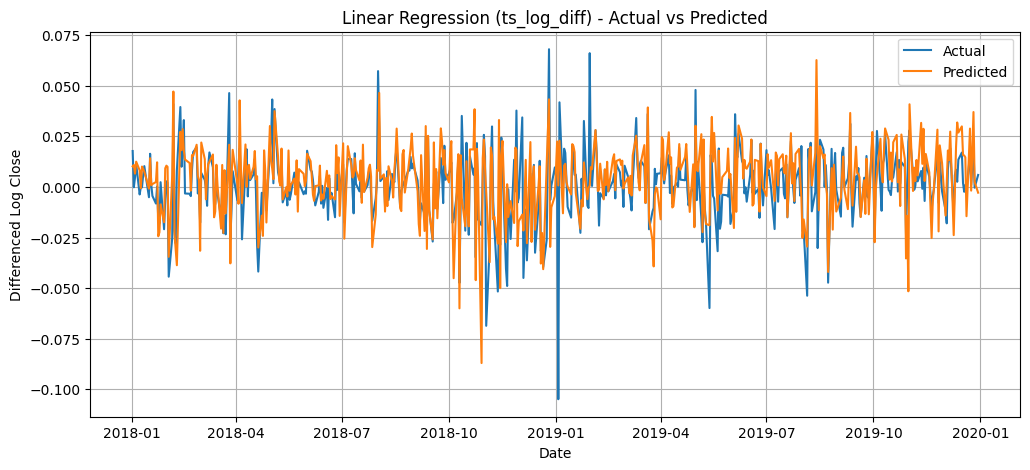


Returned metrics dict: {'mse': 0.0002290762312824692, 'rmse': np.float64(0.01513526449331062), 'mae': 0.010567672801300547}


,feature,coefficient
0,Open,-1.245079e-02
1,High,4.854422e-03
2,Low,7.106378e-03
3,Adj Close,5.158675e-04
4,Volume,1.862791e-11


In [25]:
from sklearn.linear_model import LinearRegression

# -------- 1) Fit Linear Regression --------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# -------- 2) Predict on test set --------
y_pred_lr = pd.Series(lin_reg.predict(X_test), index=y_test.index, name='lr_pred')

# -------- 3) Evaluate with your helper --------
lr_metrics = evaluate_ts_model(y_test, y_pred_lr, title='Linear Regression (ts_log_diff)')
print("\nReturned metrics dict:", lr_metrics)

# -------- 4) Optional: inspect coefficients --------
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lin_reg.coef_
})
display(coef_df)


Random Forest (ts_log_diff)
MSE : 0.000321
RMSE: 0.017930
MAE : 0.012516


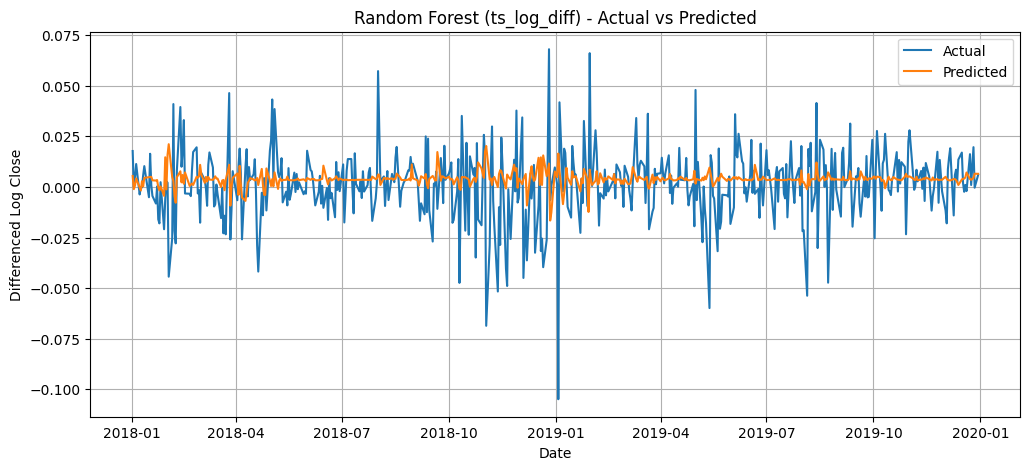


Returned metrics dict: {'mse': 0.0003214681643259297, 'rmse': np.float64(0.017929533299166762), 'mae': 0.012515669544657704}


Volume       0.372038
Adj Close    0.216803
Open         0.189924
High         0.112307
Low          0.108929
Name: importance, dtype: float64

In [26]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# -------- 1) Fit Random Forest --------
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# -------- 2) Predict on test set --------
y_pred_rf = pd.Series(rf.predict(X_test), index=y_test.index, name='rf_pred')

# -------- 3) Evaluate with your helper --------
rf_metrics = evaluate_ts_model(y_test, y_pred_rf, title='Random Forest (ts_log_diff)')
print("\nReturned metrics dict:", rf_metrics)

# -------- 4) Optional: feature importance --------
importances = pd.Series(rf.feature_importances_, index=X_train.columns, name='importance')
importances = importances.sort_values(ascending=False)
display(importances)


XGBoost (ts_log_diff)
MSE : 0.000347
RMSE: 0.018619
MAE : 0.012931


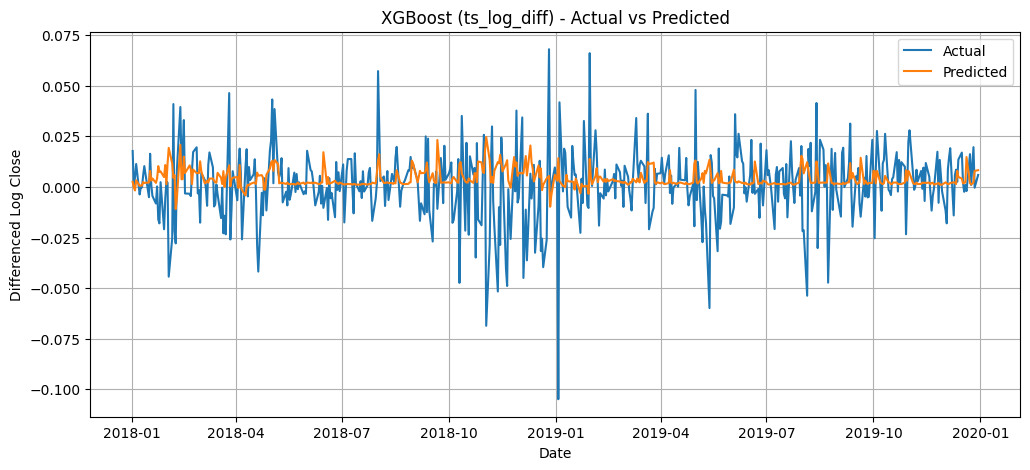


Returned metrics dict: {'mse': 0.00034665393069501237, 'rmse': np.float64(0.018618644706181284), 'mae': 0.012931132397330342}


Adj Close    0.217041
Volume       0.211971
Open         0.206407
High         0.184689
Low          0.179892
Name: importance, dtype: float32

In [27]:
from xgboost import XGBRegressor
import pandas as pd

# -------- 1) Fit XGBoost Regressor --------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# -------- 2) Predict on test set --------
y_pred_xgb = pd.Series(xgb.predict(X_test), index=y_test.index, name='xgb_pred')

# -------- 3) Evaluate with your helper --------
xgb_metrics = evaluate_ts_model(y_test, y_pred_xgb, title='XGBoost (ts_log_diff)')
print("\nReturned metrics dict:", xgb_metrics)

# -------- 4) Optional: feature importance --------
importances_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns, name='importance')
importances_xgb = importances_xgb.sort_values(ascending=False)
display(importances_xgb)


In [28]:
import warnings
warnings.filterwarnings("ignore")

ARIMA (ts_log_diff)
MSE : 0.000354
RMSE: 0.018808
MAE : 0.014142


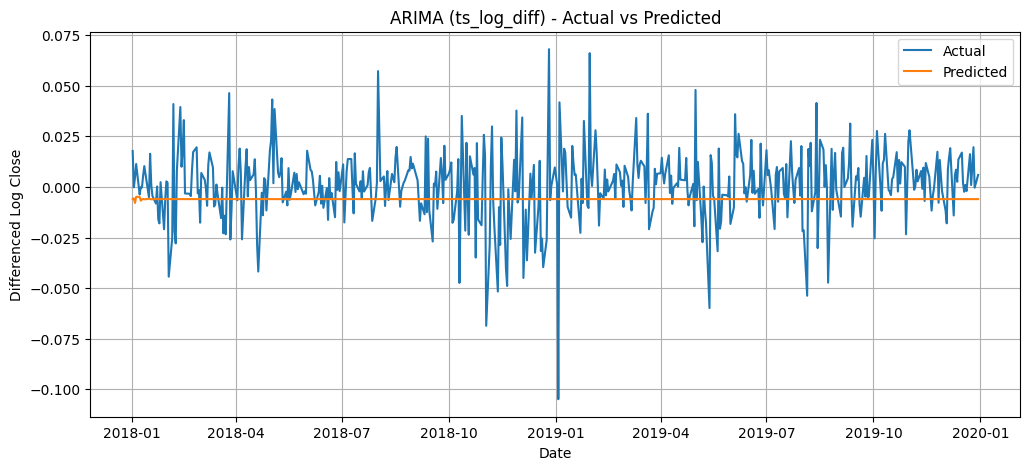

{'mse': 0.0003537577039660756,
 'rmse': np.float64(0.018808447675607777),
 'mae': 0.014142226672959161}

In [29]:
from statsmodels.tsa.arima.model import ARIMA
train_arima = y_train
test_arima = y_test

arima_order = (5,1,0)
arima_model = ARIMA(train_arima, order=arima_order)
arima_fit = arima_model.fit()
arima_pred_raw = arima_fit.forecast(steps=len(test_arima))

# Set the index of the predicted values to match the test_arima index
arima_pred = pd.Series(arima_pred_raw.values, index=test_arima.index, name='arima_pred')

evaluate_ts_model(test_arima, arima_pred, title='ARIMA (ts_log_diff)')

SARIMA (ts_log_diff)
MSE : 0.128259
RMSE: 0.358133
MAE : 0.311885


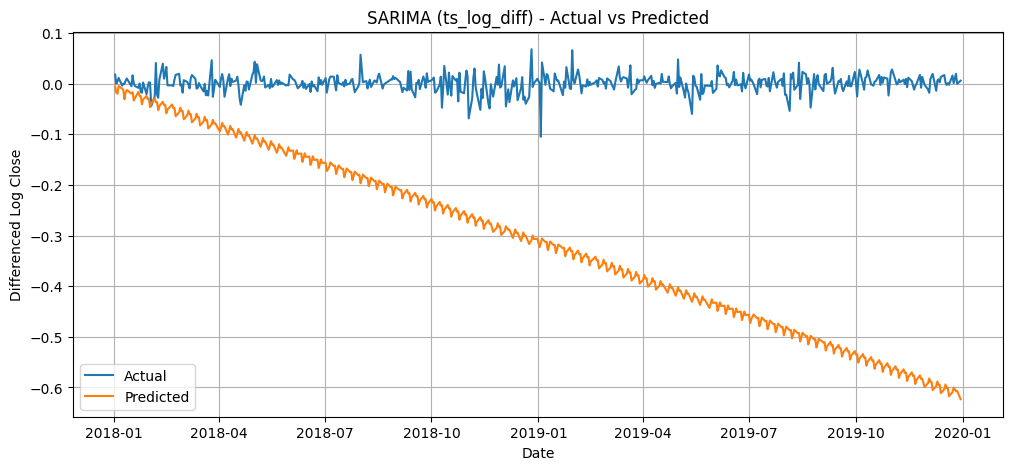


Returned SARIMA metrics dict: {'mse': 0.1282594537693357, 'rmse': np.float64(0.35813329050695036), 'mae': 0.31188464470435956}


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
# (p,d,q) - non-seasonal order
# (P,D,Q,S) - seasonal order, where S is the periodicity (e.g., 5 for weekly, 12 for monthly, 252 for yearly in daily data)
sarima_order = (5, 1, 0) # Based on previous ARIMA order, but could be optimized
sarima_seasonal_order = (0, 1, 0, 5) # Changed seasonal AR order (P) to 0 to resolve conflict

# Fit SARIMA model
sarima_model = SARIMAX(train_arima, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_fit = sarima_model.fit(disp=False) # disp=False suppresses convergence messages

# Make predictions
sarima_pred_raw = sarima_fit.forecast(steps=len(test_arima))

# Set the index of the predicted values to match the test_arima index
sarima_pred = pd.Series(sarima_pred_raw.values, index=test_arima.index, name='sarima_pred')

# Evaluate the SARIMA model
sarima_metrics = evaluate_ts_model(test_arima, sarima_pred, title='SARIMA (ts_log_diff)')
print("\nReturned SARIMA metrics dict:", sarima_metrics)

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ===== 1) Use log Close and align with train/test dates =====
log_close = ts_log.copy()   # ts_log = np.log(ts) already
log_close_train = log_close[log_close.index < test_start_date]
log_close_test  = log_close[log_close.index >= test_start_date]

# ===== 2) Scale data =====
scaler = MinMaxScaler(feature_range=(0, 1))
train_vals = scaler.fit_transform(log_close_train.values.reshape(-1, 1))
test_vals  = scaler.transform(log_close_test.values.reshape(-1, 1))

# ===== 3) Create sequences (lookback window) =====
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_len = 30  # use past 30 days to predict next day
X_train_lstm, y_train_lstm = create_sequences(train_vals, seq_len)
X_test_lstm,  y_test_lstm  = create_sequences(test_vals,  seq_len)

# reshape to [samples, time_steps, features]
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm  = X_test_lstm.reshape((X_test_lstm.shape[0],  X_test_lstm.shape[1],  1))

print("X_train_lstm:", X_train_lstm.shape)
print("X_test_lstm :", X_test_lstm.shape)

# ===== 4) Build and train LSTM model =====
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(32, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# ===== 5) Predict on test set and invert scaling/log =====
y_pred_scaled = model.predict(X_test_lstm)

# invert scaling
y_test_inv = scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_inv = scaler.inverse_transform(y_pred_scaled).flatten()

# convert back to price level: exp(log_price)
y_test_price = np.exp(y_test_inv)
y_pred_price = np.exp(y_pred_inv)

# ===== 6) Evaluation (no def, direct metrics) =====
mse_log  = mean_squared_error(y_test_inv, y_pred_inv)
rmse_log = np.sqrt(mse_log)
mae_log  = mean_absolute_error(y_test_inv, y_pred_inv)

mse_price  = mean_squared_error(y_test_price, y_pred_price)
rmse_price = np.sqrt(mse_price)
mae_price  = mean_absolute_error(y_test_price, y_pred_price)

print("\nLSTM evaluation on log price:")
print(f"MSE : {mse_log:.6f}")
print(f"RMSE: {rmse_log:.6f}")
print(f"MAE : {mae_log:.6f}")

print("\nLSTM evaluation on price level:")
print(f"MSE : {mse_price:.6f}")
print(f"RMSE: {rmse_price:.6f}")
print(f"MAE : {mae_price:.6f}")


X_train_lstm: (1479, 30, 1)
X_test_lstm : (472, 30, 1)
Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0342 - val_loss: 0.0130
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0018 - val_loss: 6.2438e-04
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - val_loss: 6.5426e-04
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011 - val_loss: 7.6171e-04
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011 - val_loss: 7.1760e-04
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010 - val_loss: 5.9122e-04
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010 - val_loss: 5.1652e-04
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9.8539e-04 - val_loss: 6.1263e-04
Epoch 9/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010 - val_loss: 8.6775e-04
Epoch 10/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.0620e-04 - val_loss: 6.9240e-04
Epoch 11/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/ste

In [32]:
from sklearn.preprocessing import MinMaxScaler

# 1. Concatenate X_train and y_train into a single DataFrame named train_data
train_data = pd.concat([X_train, y_train.rename('Close')], axis=1)

# 2. Concatenate X_test and y_test into a single DataFrame named test_data
test_data = pd.concat([X_test, y_test.rename('Close')], axis=1)

# 3. Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 4. Fit the scaler on train_data and transform train_data
scaled_train_data = scaler.fit_transform(train_data)

# 5. Transform test_data using the fitted scaler
scaled_test_data = scaler.transform(test_data)

print("Scaled training data shape:", scaled_train_data.shape)
print("Scaled testing data shape:", scaled_test_data.shape)

Scaled training data shape: (1508, 6)
Scaled testing data shape: (502, 6)


In [33]:
import numpy as np

# 7. Define a look_back window for the LSTM sequences
look_back = 60

# 8. Create a function, for instance named create_sequences
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :]) # Use all features as input
        y.append(data[i, -1]) # Predict the 'Close' (last column) of the current step
    return np.array(X), np.array(y)

# 9. Apply the create_sequences function to scaled_train_data
X_train_lstm, y_train_lstm = create_sequences(scaled_train_data, look_back)

# 10. Apply the create_sequences function to scaled_test_data
X_test_lstm, y_test_lstm = create_sequences(scaled_test_data, look_back)

# 11. Print the shapes of X_train_lstm, y_train_lstm, X_test_lstm, and y_test_lstm
print("Shape of X_train_lstm:", X_train_lstm.shape)
print("Shape of y_train_lstm:", y_train_lstm.shape)
print("Shape of X_test_lstm:", X_test_lstm.shape)
print("Shape of y_test_lstm:", y_test_lstm.shape)


Shape of X_train_lstm: (1448, 60, 6)
Shape of y_train_lstm: (1448,)
Shape of X_test_lstm: (442, 60, 6)
Shape of y_test_lstm: (442,)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 2. Initialize a Sequential model
model = Sequential()

# 3. Add the first LSTM layer
# input_shape is (timesteps, features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# 4. Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False)) # return_sequences=False for the last LSTM layer

# 5. Add a Dense output layer
model.add(Dense(units=1))

# 6. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# 7. Train the compiled LSTM model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

print("LSTM model training complete.")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0335
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0060
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0055
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0055
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0055
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0054
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0055
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0055
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0055
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0055
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0054
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0056
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0055
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0056
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0056
Epoc

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# 2. Initialize a Sequential model
model = Sequential()

# Add the Input layer explicitly
model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# 3. Add the first LSTM layer
# input_shape is (timesteps, features)
model.add(LSTM(units=50, return_sequences=True))

# 4. Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False)) # return_sequences=False for the last LSTM layer

# 5. Add a Dense output layer
model.add(Dense(units=1))

# 6. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# 7. Train the compiled LSTM model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

print("LSTM model training complete.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0318
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0057
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0055
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0055
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0057
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0056
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0056
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0055
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0058
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0058
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0056
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0056
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0055
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0055
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0054
Epoc

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
LSTM Model Evaluation (ts_log_diff)
MSE : 0.000321
RMSE: 0.017913
MAE : 0.012933


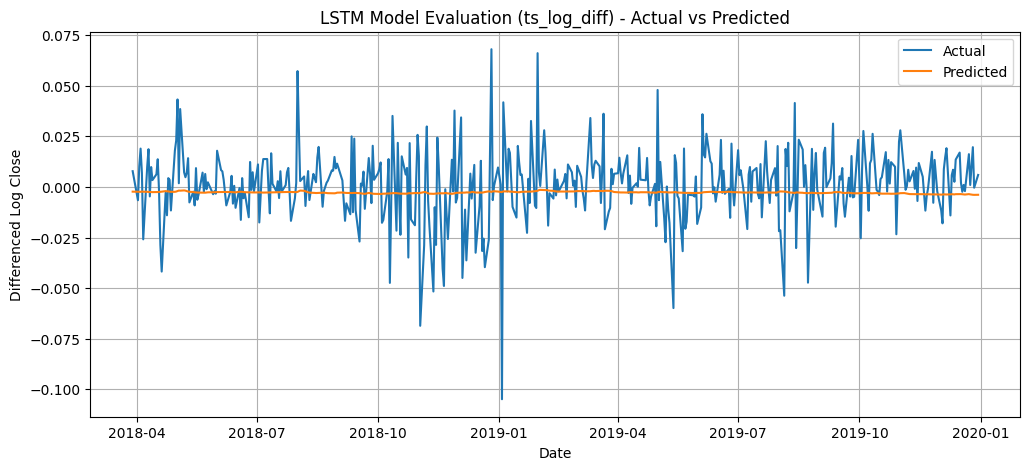


Returned LSTM metrics dict: {'mse': 0.0003208643948125195, 'rmse': np.float64(0.017912688095663352), 'mae': 0.012932836984332506}


In [36]:
import pandas as pd

# 1. Make predictions on the test set
y_pred_lstm_scaled = model.predict(X_test_lstm)

# 2. To inverse transform, we need to create dummy arrays with the same number of features
# as the data the scaler was fitted on (train_data has 6 features: Open, High, Low, Adj Close, Volume, Close)
dummy_pred_array = np.zeros((len(y_pred_lstm_scaled), scaled_train_data.shape[1]))
dummy_true_array = np.zeros((len(y_test_lstm), scaled_train_data.shape[1]))

# Place the scaled predictions and actual values into the 'Close' column (last column, index -1)
dummy_pred_array[:, -1] = y_pred_lstm_scaled.flatten()
dummy_true_array[:, -1] = y_test_lstm

# 3. Inverse transform the predictions and actual values to the original 'ts_log_diff' scale
y_pred_lstm_inv_scaled = scaler.inverse_transform(dummy_pred_array)[:, -1]
y_test_lstm_inv_scaled = scaler.inverse_transform(dummy_true_array)[:, -1]

# 4. Get the corresponding time index for the test set predictions
# The create_sequences function starts from look_back index within the test_data
predictions_index = y_test.index[look_back:]

# 5. Convert to pandas Series for evaluation
y_pred_lstm_series = pd.Series(y_pred_lstm_inv_scaled, index=predictions_index, name='LSTM_Predicted')
y_true_lstm_series = pd.Series(y_test_lstm_inv_scaled, index=predictions_index, name='LSTM_Actual')

# 6. Evaluate the model using the custom evaluate_ts_model function
lstm_metrics = evaluate_ts_model(y_true_lstm_series, y_pred_lstm_series, title='LSTM Model Evaluation (ts_log_diff)')
print("\nReturned LSTM metrics dict:", lstm_metrics)

In [37]:
# Build a continuous scaled series (train+test) for forecasting
full_scaled = np.vstack([scaled_train_data, scaled_test_data])

# start with last look_back window
last_window = full_scaled[-look_back:, :]            # shape (60, 6)
forecast_steps = 30
future_preds_scaled = []

window = last_window.copy()
for _ in range(forecast_steps):
    inp = window[np.newaxis, :, :]                   # (1, 60, 6)
    next_scaled_close = model.predict(inp, verbose=0)[0, 0]
    future_preds_scaled.append(next_scaled_close)

    # append prediction into last column, keep other features unchanged (or zeros)
    next_row = np.zeros((1, full_scaled.shape[1]))
    next_row[0, -1] = next_scaled_close
    window = np.vstack([window[1:], next_row])

future_preds_scaled = np.array(future_preds_scaled).reshape(-1, 1)

# inverse transform to ts_log_diff scale
dummy_future = np.zeros((forecast_steps, full_scaled.shape[1]))
dummy_future[:, -1] = future_preds_scaled.flatten()
future_ts_log_diff = scaler.inverse_transform(dummy_future)[:, -1]

future_dates = pd.date_range(start=y.index.max() + pd.Timedelta(days=1),
                             periods=forecast_steps, freq='B')  # next 30 business days

future_lstm_series = pd.Series(future_ts_log_diff, index=future_dates, name='LSTM_future_ts_log_diff')
print(future_lstm_series.head())


2019-12-31   -0.003814
2020-01-01   -0.000818
2020-01-02    0.002619
2020-01-03    0.005442
2020-01-06    0.007471
Freq: B, Name: LSTM_future_ts_log_diff, dtype: float64


In [38]:
import json
import pickle

metadata = {
    "look_back": look_back,                     # 60
    "feature_columns": list(train_data.columns),# ['Open','High','Low','Adj Close','Volume','Close']
    "target_name": "Close",
    "freq": "B"
}

with open('config.json', 'w') as f:
    json.dump(metadata, f, indent=4)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

model.save('lstm_model.keras')
print("Saved: lstm_model.keras, scaler.pkl, config.json")


Saved: lstm_model.keras, scaler.pkl, config.json
